In [1]:
%matplotlib inline

import os
import subprocess
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

BASE_DIR = os.path.dirname(os.path.realpath('.'))

np.random.seed(42)

In [2]:
def get_titanic_dataset():
    """
    To use this function, you must create a kaggle API token
    https://github.com/Kaggle/kaggle-api
    """
    dataset_dir = os.path.join(BASE_DIR, 'datasets', 'titanic')
    train_path = os.path.join(dataset_dir, 'train.csv')
    test_path = os.path.join(dataset_dir, 'test.csv')
    
    data_exists = os.path.isfile(train_path) and os.path.isfile(test_path)
    if not data_exists:
        os.makedirs(dataset_dir, exist_ok=True)
        subprocess.check_call(['kaggle', 'competitions', 'download', '-c', 'titanic', '-p', dataset_dir])
    
    df_train = pd.read_csv(train_path)
    df_test = pd.read_csv(test_path)
    
    X_train = df_train.drop(columns=['Survived'])
    y_train = df_train['Survived']
    X_test = df_test
    
    return X_train, y_train, X_test

In [17]:
X_train, y_train, X_test = get_titanic_dataset()

X_train_copy = X_train.copy()
X_train_copy['Survived'] = y_train
df_train = X_train_copy

In [4]:
X_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
X_train.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [28]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 76.6+ KB


In [32]:
X_train['Ticket'].value_counts().head()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
Name: Ticket, dtype: int64

In [30]:
X_train['Cabin'].value_counts(dropna=False).head()

NaN            687
B96 B98          4
G6               4
C23 C25 C27      4
F33              3
Name: Cabin, dtype: int64

In [31]:
X_train['Embarked'].value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [9]:
X_train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [33]:
X_train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [34]:
X_train[X_train['Pclass'] == 3]['Cabin'].value_counts(dropna=False).head()

NaN      479
G6         4
F G73      2
E121       2
F38        1
Name: Cabin, dtype: int64

In [35]:
X_train[X_train['Pclass'] == 2]['Cabin'].value_counts(dropna=False).head()

NaN     168
F33       3
D         3
F2        3
E101      3
Name: Cabin, dtype: int64

In [38]:
X_train[X_train['Pclass'] == 1]['Cabin'].value_counts(dropna=False).head()

NaN            40
C23 C25 C27     4
B96 B98         4
C22 C26         3
B18             2
Name: Cabin, dtype: int64

In [41]:
y_train.value_counts()

0    549
1    342
Name: Survived, dtype: int64

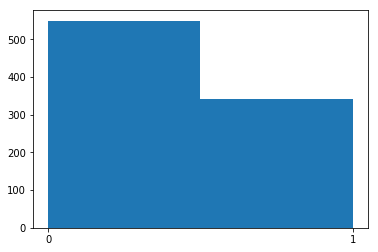

In [14]:
plt.hist(y_train, bins=2)
plt.xticks([0, 1])
plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x128ac7d68>,
      dtype=object)

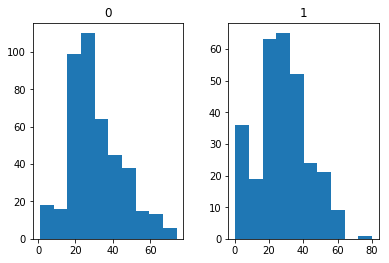

In [108]:
df_train.hist('Age', by='Survived', xrot=360)

In [23]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(sparse=False)
res = enc.fit_transform(df_train[['Sex']])
df_sex = pd.DataFrame(res, columns=enc.get_feature_names(['Sex']))

pd.concat([df_train, df_sex], axis=1)[['Pclass', 'Survived', 'Sex_male', 'Sex_female']].corr()

,Pclass,Survived,Sex_male,Sex_female
Pclass,1.000000,-0.338481,0.131900,-0.131900
Survived,-0.338481,1.000000,-0.543351,0.543351
Sex_male,0.131900,-0.543351,1.000000,-1.000000
Sex_female,-0.131900,0.543351,-1.000000,1.000000


In [117]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler


num_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())
])
num_cols = ['Age', 'SibSp', 'Parch', 'Fare']
num_feature_names = [c.lower() for c in num_cols]

cat_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('one_hot', OneHotEncoder(sparse=False))
])

cat_cols = ['Pclass', 'Sex', 'Embarked']
cat_pipeline.fit_transform(X_train[cat_cols])
_, enc = cat_pipeline.steps[-1]
cat_feature_names = list(enc.get_feature_names([c.lower() for c in cat_cols]))

train_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
])

train_pipeline_feature_names = num_feature_names + cat_feature_names

X_train_prep = train_pipeline.fit_transform(X_train)

In [119]:
pd.DataFrame(X_train_prep, columns=train_pipeline_feature_names).head()

,age,sibsp,parch,fare,pclass_1,pclass_2,pclass_3,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,-0.565736,0.432793,-0.473674,-0.502445,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,0.663861,0.432793,-0.473674,0.786845,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,-0.258337,-0.474545,-0.473674,-0.488854,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,0.433312,0.432793,-0.473674,0.420730,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.433312,-0.474545,-0.473674,-0.486337,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [140]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train_prep, y_train)

/Users/henryehly/src/handson-ml/.venv-3.6.8/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)